#### Exploratory Data Analysis (EDA)

This notebook explores the LendingClub accepted loans dataset to understand  
its structure, data quality, and potential risks such as data leakage.  
The goal is to ensure that only realistic, application-time features are used  
for modeling.


In [2]:
### importing lib 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
### configurations 
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format","{:.3f}".format)
sns.set_style("whitegrid")

In [4]:
DATA_PATH = "../../data/raw/accepted_2007_to_2018Q4.csv"
df = pd.read_csv(DATA_PATH,low_memory=False)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.000,3600.000,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.910,0.000,Aug-2003,675.000,679.000,1.000,30.000,NaN,7.000,0.000,2765.000,29.700,13.000,w,0.000,0.000,4421.724,4421.720,3600.000,821.720,0.000,0.000,0.000,Jan-2019,122.670,NaN,...,4.000,7.000,0.000,0.000,0.000,3.000,76.900,0.000,0.000,0.000,178050.000,7746.000,2400.000,13734.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.000,24700.000,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.060,1.000,Dec-1999,715.000,719.000,4.000,6.000,NaN,22.000,0.000,21470.000,19.200,38.000,w,0.000,0.000,25679.660,25679.660,24700.000,979.660,0.000,0.000,0.000,Jun-2016,926.350,NaN,...,5.000,22.000,0.000,0.000,0.000,2.000,97.400,7.700,0.000,0.000,314017.000,39475.000,79300.000,24667.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.000,20000.000,20000.000,60 months,10.780,432.660,B,B4,truck driver,10+ years,MORTGAGE,63000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.780,0.000,Aug-2000,695.000,699.000,0.000,NaN,NaN,6.000,0.000,7869.000,56.200,18.000,w,0.000,0.000,22705.924,22705.920,20000.000,2705.920,0.000,0.000,0.000,Jun-2017,15813.300,NaN,...,3.000,6.000,0.000,0.000,0.000,0.000,100.000,50.000,0.000,0.000,218418.000,18696.000,6200.000,14877.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.000,35000.000,35000.000,60 months,14.850,829.900,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.000,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.060,0.000,Sep-2008,785.000,789.000,0.000,NaN,NaN,13.000,0.000,7802.000,11.600,17.000,w,15897.650,15897.650,31464.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [28]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,issue_year
count,0.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260664.000,2260668,2258957.000,2260639.000,2260668.000,2260668.000,2260638.000,1102166.000,359156.000,2260639.000,2260639.000,2260668.000,2258866.000,2260639.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260523.000,580775.000,2260668.000,120710.000,120706.000,2260639.000,2190392.000,2190392.000,1394538.000,1394539.000,1394539.000,1394539.000,1350744.000,1394539.000,1191818.000,1394539.000,1394539.000,1394539.000,...,2210638.000,2187256.000,519701.000,1965233.000,740359.000,2190392.000,2190392.000,2190392.000,2202078.000,2190392.000,2190392.000,2190392.000,2190391.000,2190392.000,2202078.000,2107011.000,2190392.000,2190392.000,2190392.000,2190237.000,2185289.000,2259303.000,2260563.000,2190392.000,2210638.000,2210638.000,2190392.000,108020.000,108021.000,108021.000,108021.000,108021.000,108021.000,106184.000,108021.000,108021.000,108021.000,108021.000,35942.000,10917.000,10917.000,10917.000,10917.000,8651.000,10917.000,10917.000,34246.000,34246.000,34246.000,2260668.000
mean,NaN,15046.931,15041.664,15023.438,13.093,445.807,77992.429,2016-05-02 18:48:08.652733696,18.824,0.307,698.588,702.588,0.577,34.541,72.313,11.612,0.198,16658.458,50.338,24.163,4206.891,4205.965,12082.557,12064.395,9505.772,2431.388,1.518,143.879,23.983,3429.346,687.661,675.540,0.018,44.164,1.000,123624.637,19.252,0.004,232.732,142492.195,0.934,2.779,0.676,1.563,21.222,35506.645,69.141,1.290,2.750,5806.393,...,1.555,24.845,39.303,7.024,35.782,0.500,3.676,5.629,4.774,7.726,8.413,8.247,14.005,5.578,11.628,0.001,0.003,0.083,2.077,94.115,42.435,0.128,0.047,178242.754,51022.938,23193.768,43732.013,33617.279,669.756,673.756,0.633,1.539,11.469,58.169,3.011,12.533,0.046,0.078,36.938,3.000,155.046,3.000,13.744,454.798,11636.884,193.994,5010.664,47.780,13.191,2015.858
min,NaN,500.000,500.000,0.000,5.310,4.930,0.000,2007-06-01 00:00:00,-1.000,0.000,610.000,614.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,5693.510,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

## Dataset Overview

The dataset contains historical loan applications accepted by LendingClub
between 2007 and 2018.

- Each row represents **one loan**
- The dataset includes applicant details, loan information,
  credit history, and loan outcomes





In [9]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [11]:
## now we are focusing on target "loan_status"
df["loan_status"].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [12]:
df["loan_status"].value_counts(normalize=True)*100

loan_status
Fully Paid                                            47.630
Current                                               38.852
Charged Off                                           11.880
Late (31-120 days)                                     0.950
In Grace Period                                        0.373
Late (16-30 days)                                      0.192
Does not meet the credit policy. Status:Fully Paid     0.088
Does not meet the credit policy. Status:Charged Off    0.034
Default                                                0.002
Name: proportion, dtype: float64

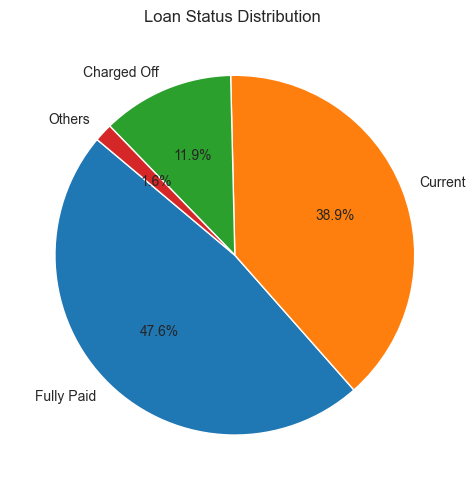

In [26]:
### making a pie chart on loan status  
df["loan_status_grouped"] = df["loan_status"].where(
    df["loan_status"].isin(["Fully Paid", "Current", "Charged Off"]),
    "Others"
)

# Count grouped statuses
status_grouped_counts = df["loan_status_grouped"].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(
    status_grouped_counts,
    labels=status_grouped_counts.index,
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Loan Status Distribution ")
plt.tight_layout()
plt.show()


## Loan Status Analysis

The `loan_status` column represents the current or final repayment status of each loan.

From the data, we observe the following distribution:

- **Fully Paid** loans make up around **47.6%** of the dataset.
- **Charged Off** loans account for about **11.9%**, which represents actual loan defaults.
- **Current** loans are still active and form a large portion of the data (**~38.9%**).
- Other statuses such as *Late*, *In Grace Period*, and *Default* occur in much smaller proportions.

Only **Fully Paid** and **Charged Off** loans have a **final outcome**.
Loans marked as **Current**, **Late**, or **In Grace Period** are still ongoing, and their final repayment behavior is not yet known.

For this reason, ongoing loans will be **excluded later when defining the target variable**, to ensure the model is trained only on loans with known outcomes.



In [ ]:
#extract years from "issue_d"
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y", errors="coerce")



In [18]:
df["issue_year"] = df["issue_d"].dt.year.astype("Int64")


In [19]:
df[["issue_d", "issue_year"]].head()


,issue_d,issue_year
0,2015-12-01,2015
1,2015-12-01,2015
2,2015-12-01,2015
3,2015-12-01,2015
4,2015-12-01,2015


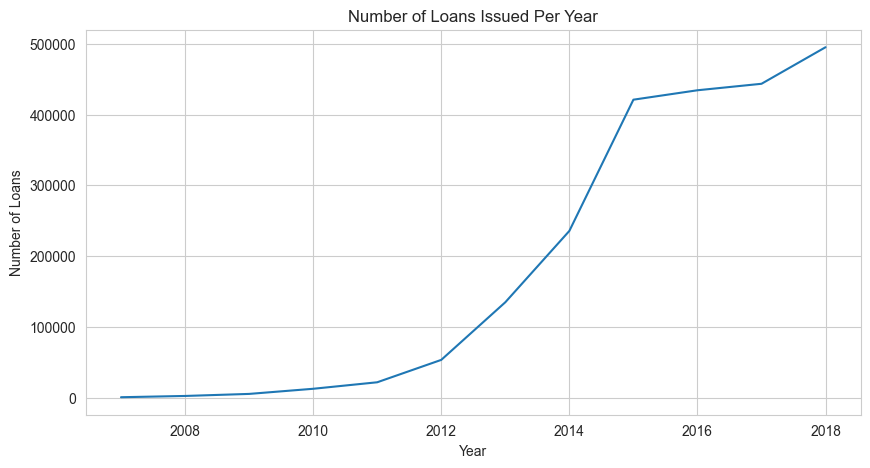

In [20]:
plt.figure(figsize=(10, 5))
df["issue_year"].value_counts().sort_index().plot()
plt.title("Number of Loans Issued Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Loans")
plt.show()


## Time Coverage Analysis

The plot shows the number of loans issued per year from 2007 to 2018.

Loan volume is very low in the early years and increases gradually until around 2011.
From 2012 onwards, there is a sharp increase in the number of issued loans, with
high volumes continuing through 2018.

This indicates that the dataset covers multiple time periods and different business
phases of the lending platform.



In [31]:
num_features = df.select_dtypes(include=["int64", "float64"]).columns
cat_features = df.select_dtypes(include=["object"]).columns

print("Numeric features:", len(num_features))
print("Categorical features:", len(cat_features))


Numeric features: 114
Categorical features: 38


In [32]:
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_pct.head(20)


member_id                                    100.000
orig_projected_additional_accrued_interest    99.617
payment_plan_start_date                       99.517
hardship_status                               99.517
hardship_start_date                           99.517
hardship_dpd                                  99.517
hardship_loan_status                          99.517
hardship_length                               99.517
deferral_term                                 99.517
hardship_payoff_balance_amount                99.517
hardship_last_payment_amount                  99.517
hardship_end_date                             99.517
hardship_amount                               99.517
hardship_type                                 99.517
hardship_reason                               99.517
settlement_status                             98.485
debt_settlement_flag_date                     98.485
settlement_amount                             98.485
settlement_date                               

### Missing Values Observation

Several columns in the dataset have extremely high missing values (above 98–100%).

Most of these columns are related to:
- hardship programs
- settlement details
- post-loan events

This indicates that these fields are only applicable to a **very small subset of loans**, usually after financial stress or default has already occurred.

Because these features are:
- mostly empty
- not available at loan application time
- closely tied to loan outcomes

they will be excluded from model training to avoid noise and data leakage.


In [33]:
leakage_columns = [
    "last_pymnt_d",
    "last_pymnt_amnt",
    "total_pymnt",
    "total_pymnt_inv",
    "recoveries",
    "collection_recovery_fee",
    "out_prncp",
    "out_prncp_inv"
]

df[leakage_columns].head()


,last_pymnt_d,last_pymnt_amnt,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,out_prncp,out_prncp_inv
0,Jan-2019,122.670,4421.724,4421.720,0.000,0.000,0.000,0.000
1,Jun-2016,926.350,25679.660,25679.660,0.000,0.000,0.000,0.000
2,Jun-2017,15813.300,22705.924,22705.920,0.000,0.000,0.000,0.000
3,Feb-2019,829.900,31464.010,31464.010,0.000,0.000,15897.650,15897.650
4,Jul-2016,10128.960,11740.500,11740.500,0.000,0.000,0.000,0.000


Some columns in the dataset contain information that is only available
**after the loan has been issued and payments have occurred**.

Examples include:
- Total amount paid
- Last payment date
- Recovery amounts

Using these features during training would cause **data leakage**,
because they indirectly reveal the loan outcome.

These features will be excluded from model training.


In [34]:
df["loan_status"].isin(["Fully Paid", "Charged Off"]).value_counts()


loan_status
True     1345310
False     915391
Name: count, dtype: int64

Only loans with a clear final outcome will be used for modeling.

Loans that are still active or in intermediate states
will be excluded to ensure a clean and realistic target definition.
